# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 23% of the assignment grade.

**Note**: Questions 2-12 rely on your question 1c answer.

In [1]:
import re
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1(a)

Complete the function `load_data` below to load three datasets that we will use in subsequent questions. Be sure to follow the instructions below for each dataset *respectively*. 



**Energy**

Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of `energy`.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.



**GDP**

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame `gdp`. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```



**ScimEn**

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame `scim_en`.

**For all three datasets, use country names as the index.**

In [2]:
import pandas as pd
import numpy as np
def load_data():
    # Competency: reading files in Pandas, df manipulation, regex
    
    # The three variables are initialized to None. You will fill them with the correct values. 
    energy = pd.read_excel('assets/Energy Indicators.xls', skiprows = 17, skip_footer = 38, usecols = "C:F")
    col_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # Rename the columns
    energy.columns = col_names

    # Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule). 
    # For all countries which have missing data (e.g. data with "...") make sure this is 
    # reflected as np.NaN values.
    energy['Energy Supply'] *= 1000000
    energy.replace('\.+', np.nan, regex=True, inplace = True)

    # Rename the following list of countries
    replace_dict = {"Republic of Korea": "South Korea",
                    "United States of America": "United States",
                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                    "China, Hong Kong Special Administrative Region": "Hong Kong"}

    # Removes digits and text enclosed in parantheses
    energy['Country'] = energy['Country'].str.replace('\d+','').str.replace('\s*\(.*?\)\s*', '').replace(replace_dict)
    energy.set_index('Country', inplace = True)
    
    gdp = pd.read_csv('assets/world_bank.csv', sep = ',', skiprows = 4)

    country_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"}

    gdp['Country Name'] = gdp['Country Name'].replace(country_dict)
    gdp = gdp.set_index('Country Name')
    
    scim_en = pd.read_excel('assets/scimagojr-3.xlsx')
    scim_en.set_index('Country', inplace = True)
    
    return energy, gdp, scim_en
load_data()

(                Energy Supply  Energy Supply per Capita  % Renewable
 Country                                                             
 Afghanistan      3.210000e+08                      10.0    78.669280
 Albania          1.020000e+08                      35.0   100.000000
 Algeria          1.959000e+09                      51.0     0.551010
 American Samoa            NaN                       NaN     0.641026
 Andorra          9.000000e+06                     121.0    88.695650
 ...                       ...                       ...          ...
 NaN                       NaN                       NaN          NaN
 NaN                       NaN                       NaN          NaN
 NaN                       NaN                       NaN          NaN
 NaN                       NaN                       NaN          NaN
 NaN                       NaN                       NaN          NaN
 
 [265 rows x 3 columns],
                  Country Code                            Indic

In [24]:
# energy, gdp, scim_en = load_data()
# all([isinstance(energy, pd.DataFrame), isinstance(gdp, pd.DataFrame), isinstance(scim_en, pd.DataFrame)])

True

In [ ]:
# Cell for autograder.


### Question 1(b)

Now suppose we take the intersection of the three datasets based on the country names, how many *unique* entries will we lose? Complete the function below that returns the answer as a single number. The Venn diagram in the next cell is worth a thousand words. 

*This function should return a single (whole) number.*

In [26]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [3]:
def answer_1b():
    # Competency: joining datasets, sets
    # YOUR CODE HERE
    energy, gdp, scim_en = load_data()
    intersect = pd.merge(pd.merge(scim_en, energy, how = 'inner', left_index = True, right_index = True), gdp, how = 'inner', left_index = True, right_index = True)
    # Python Pandas Dataframe merge and pick only few columns
    #merged = pd.merge(merged, gdp[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']], how = 'inner', left_index = True, right_index = True)
    
    merged_outer = pd.merge(pd.merge(scim_en, energy, how = 'outer', left_index = True, right_index = True), gdp, how = 'outer', left_index = True, right_index = True)
    # Python Pandas Dataframe merge and pick only few columns
    #merged_outer = pd.merge(merged, gdp[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']], how = 'left', left_index = True, right_index = True)

    return len(merged_outer) - len(intersect)
    #raise NotImplementedError()
answer_1b()

194

In [ ]:
# Cell for autograder.


### Question 1(c)

Join the three datasets to form a new dataset, using the intersection of country names. Keep only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of the resultant DataFrame should still be the name of the country, and the columns should be 

```['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
    'Citations per document', 'H index', 'Energy Supply',
    'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
    '2009', '2010', '2011', '2012', '2013', '2014', '2015']```.

*This function should return a DataFrame with 20 columns and 15 entries.*

In [4]:
def answer_1c():
    # Competency: df manipulation, joining datasets
    energy, gdp, scim_en = load_data()
    # YOUR CODE HERE
    scim_en = scim_en[scim_en['Rank'] <=15]
    merged = pd.merge(scim_en, energy, how = 'left', left_index = True, right_index = True)
    # Python Pandas Dataframe merge and pick only few columns
    merged = pd.merge(merged, gdp[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']], how = 'left', left_index = True, right_index = True)
    # The index of this DataFrame should be the name of the country, 
    # and the columns should be 
    #['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
    #merged = merged.set_index('Country')
    return merged
    #raise NotImplementedError()
answer_1c()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


In [35]:
your_ans = answer_1c()

assert isinstance(your_ans, pd.DataFrame), "Q1c: Your function should return a DataFrame."

assert your_ans.shape == (15, 20), "Q1c: Your resultant DataFrame should have 20 columns and 15 entries."

assert list(your_ans.columns) == ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                                 'Citations per document', 'H index', 'Energy Supply','Energy Supply per Capita', '% Renewable', 
                                 '2006', '2007', '2008','2009', '2010', '2011', '2012', '2013', '2014', '2015'] , "Q1c: The column names should be as specified in the question. "
del your_ans

In [ ]:
# Cell for autograder.


**Note: all subsequent questions rely on the DataFrame returned by your function in Question 1(c) above.**

### Question 2
What is the average GDP over the last 10 years for each country?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [57]:
def answer_two():
    # Competency: indexing, math fn, sorting
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    year_list = ['2006', '2007', '2008', '2009', '2010',
                 '2011', '2012', '2013', '2014', '2015']
    avgGDP = merged[year_list].apply(np.mean, axis = 1).rename('avgGDP').sort_values(ascending = False)
    
    return pd.Series(avgGDP)
    
    #raise NotImplementedError()
answer_two()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [58]:
your_ans = answer_two()

assert isinstance(your_ans, pd.Series), "Q2: You should return a Series. "
assert your_ans.name == "avgGDP", "Q2: Your Series should have the correct name. "

del your_ans

In [ ]:
# Cell for autograder.


### Question 3

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [62]:
def answer_three():
    # Competency: indexing, broadcasting
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    change = merged.loc['United Kingdom']['2015'] - merged.loc['United Kingdom']['2006']
    
    return change
    
    #raise NotImplementedError()
answer_three()

246702696075.3999

In [ ]:
# Cell for autograder.


### Question 4

What is the mean energy supply per capita?

*This function should return a single number.*

In [68]:
def answer_four():
    # Competency: math fn
    
    # YOUR CODE HERE
    merged = answer_1c()
    
    #merged.iloc[:,8].mean()
    return merged['Energy Supply per Capita'].mean()
    # raise NotImplementedError()
answer_four()

# 157.6

157.6

In [ ]:
# Cell for autograder.


### Question 5

What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [71]:
def answer_five():
    # Competency: math fn
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    
    #merged['% Renewable'].idxmax()
    
    return (merged['% Renewable'].idxmax(), merged['% Renewable'].max())
    
    #raise NotImplementedError()
answer_five()

('Brazil', 69.64803)

In [72]:
your_ans = answer_five()

assert isinstance(your_ans, tuple), "Q5: Your function should return a tuple. "

assert isinstance(your_ans[0], str), "Q5: The first element in your result should be the name of the country. "

del your_ans

In [ ]:
# Cell for autograder.


### Question 6

Create a new column that is the ratio of `Self-Citations` to total `Citations`. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [75]:
def answer_six():
    # Competency: math fn, broadcasting
    
    # YOUR CODE HERE
    merged = answer_1c()
    
    merged['Ratio'] = merged['Self-citations'] / merged['Citations']
    
    return (merged['Ratio'].idxmax(), merged['Ratio'].max())
    
    #raise NotImplementedError()
answer_six()

('China', 0.6893126179389422)

In [76]:
your_ans = answer_six()

assert isinstance(your_ans, tuple), "Q6: Your function should return a tuple. "

assert isinstance(your_ans[0], str), "Q6: The first element in your result should be the name of the country. "

del your_ans

In [ ]:
# Cell for autograder.


### Question 7

Create a column that estimates the population using `Energy Supply` and `Energy Supply per capita`. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [97]:
def answer_seven():
    # Competency: Broadcasting, sorting
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    merged['Population'] = merged['Energy Supply'] / merged['Energy Supply per Capita']
    #merged[merged['Population'] == merged['Population'].nlargest(3)[2]].index
    
    return merged[merged['Population'] == merged['Population'].nlargest(3)[2]].index[0]
    #raise NotImplementedError()
answer_seven()

'United States'

In [98]:
assert isinstance(answer_seven(), str), "Q7: Your function should return the name of the country. "

In [ ]:
# Cell for autograder.


### Question 8

Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

In [192]:
def answer_eight():
    # Competency: Broadcasting, math fn, correlation, visualization
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    merged['Population'] = merged['Energy Supply'] / merged['Energy Supply per Capita']
    merged['Citable Documents per Capita'] = merged['Citable documents'] / merged['Population']
    #['Citable documents', 'Energy Supply per Capita']
    #merged.corr(method = 'pearson')
    #return merged
    #return merged[['Citable documents', 'Energy Supply per Capita']].corr(method = 'pearson').iloc[0,1]
    return merged.corr(method = 'pearson').loc['Citable Documents per Capita']['Energy Supply per Capita']

    #raise NotImplementedError()
answer_eight()

0.7940010435442943

In [115]:
assert -1 <= answer_eight() <= 1, "Q8: A valid correlation should be between -1 to 1. "

In [ ]:
# Cell for autograder.


### Question 9

Create a new column with a 1 if a country's `% Renewable` value is **at or above** the median, and a 0 otherwise for all countries in the top 15. 

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [122]:
def answer_nine():
    # Competency: df querying, math fn, variable encoding
    # YOUR CODE HERE
    
    merged = answer_1c()
    merged['HighRenew'] = None
    merged['HighRenew'][merged['% Renewable'] >= merged['% Renewable'].median()] = 1
    merged['HighRenew'][merged['% Renewable'] < merged['% Renewable'].median()] = 0
    
    HighRenew = merged['HighRenew']
    return pd.Series(HighRenew)
    #raise NotImplementedError()
answer_nine()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: object

In [117]:
assert isinstance(answer_nine(), pd.Series), "Q9: Your function should return a Series. "

In [ ]:
# Cell for autograder.


### Question 10

Use the following dictionary to group the `Countries` by `Continent`, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and *population* standard deviation of the estimated population for each country. 

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

**Special Note: make sure you are indeed calculating the *population* std rather than the sample std. When in doubt, carefully check the documentation of the function you plan to use. Don't take things for granted.**

In [149]:
def answer_ten():
    # Competency: mapping, groupby, agg
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    merged['Continent'] = None
    merged['Population'] = merged['Energy Supply'] / merged['Energy Supply per Capita']
    
    # Assign mapped values
    
    for i in range(len(merged)):
        merged.iloc[i,20] = ContinentDict[merged.index[i]]
    ans_df = merged.groupby('Continent').agg([np.size, np.sum, np.mean, np.std])['Population']
    
    return ans_df
    
    #raise NotImplementedError()
answer_ten()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [150]:
your_ans = answer_ten()

assert isinstance(your_ans, pd.DataFrame), "Q10: Your function should return a DataFrame. "

assert your_ans.shape[0] == 5, "Q10: You have a incorrect number of rows. "

assert your_ans.shape[1] == 4, "Q10: You have a incorrect number of columns. "

assert list(your_ans.index) == ['Asia', 'Australia', 'Europe', 'North America', 'South America'], "Q10: You have a wrong index. "

assert list(your_ans.columns) == ['size', 'sum', 'mean', 'std'], "Q10: You have wrong column names. "

assert np.isclose(your_ans.loc["Asia", "sum"], 2898666386.6106005, rtol=0.0, atol=1e-5), "Q10: The sum value for Asia should be around 2898666386.6106005. "

assert np.isclose(your_ans.loc["Europe", "mean"], 76321611.20272864, rtol=0.0, atol=1e-5), "Q10: The mean value for Europe should be around 76321611.20272864. "

assert np.isnan(your_ans.loc["South America", "std"]), "Q10: South America should have a NaN std. "

del your_ans

In [ ]:
# Cell for autograder.


### Question 11
Cut `% Renewable` into 5 bins. Group the top 15 countries by `Continent` as well as these new `% Renewable` bins. How many countries are there in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [172]:
def answer_eleven():
    # Competency: cut, groupby, math fn
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    merged['Continent'] = None
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    for i in range(len(merged)):
        merged.iloc[i,20] = ContinentDict[merged.index[i]]
    
    merged['% Renewable'] = pd.cut(x=merged['% Renewable'], bins=5)
    list_index = ['Continent', '% Renewable']
    merged = merged[list_index]
#     merged = merged.set_index([list_index])
#     merged.groupby(list_index).agg([np.size])
    return pd.Series(merged.groupby(list_index).size())#.agg({"Continent":np.size}).dropna()
    #raise NotImplementedError()
answer_eleven()

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [173]:
your_ans = answer_eleven()

assert isinstance(your_ans, pd.Series), "Q11: Your function should return a Series. "

assert len(your_ans) == 9, "Q11: Your answer should have 9 rows. "

del your_ans

In [ ]:
# Cell for autograder.


### Question 12

Write a function to display the estimated population as a string with thousands separator (using commas). Use all significant digits, namely, do not round the results.

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

**Special Note: make sure your `Energy Supply` column is of a numerical type rather than "object".**

In [193]:
def answer_twelve():
    # Competency: lambdas, format
    
    # YOUR CODE HERE
    
    merged = answer_1c()
    merged['PopEst'] = merged['Energy Supply'] / merged['Energy Supply per Capita']
    PopEst = merged['PopEst'].apply(lambda x: format(x, ','))
    return PopEst
    #raise NotImplementedError()
answer_twelve()    

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

In [194]:
your_ans = answer_twelve()

assert isinstance(your_ans, pd.Series), "Q12: Your function should return a Series. "

assert len(your_ans) == 15, "Q12: There should be 15 countries. "

del your_ans

In [ ]:
# Cell for autograder.


### Optional

Use the built in function `plot_optional()` to see an example visualization.

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


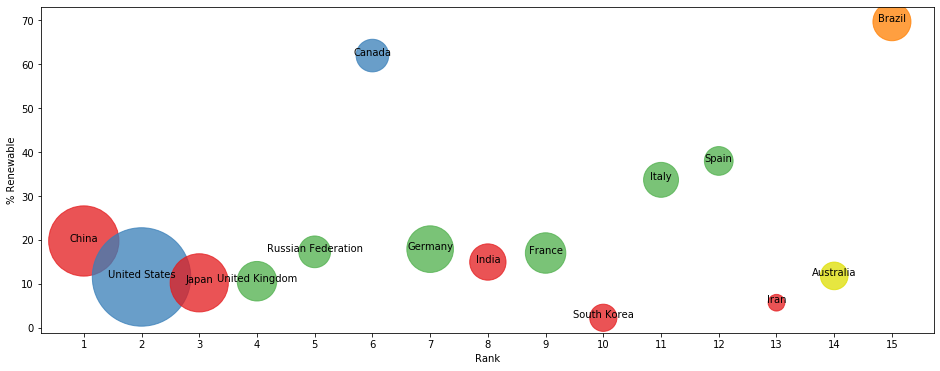

In [195]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_1c()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_optional()